In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv("data/accident_prediction_india.csv")

In [29]:
df.columns

Index(['State Name', 'City Name', 'Year', 'Month', 'Day of Week',
       'Time of Day', 'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)',
       'Driver Age', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details'],
      dtype='object')

In [30]:
df.head()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


In [31]:
import pandas as pd
import random

# Mapping of Indian states to major cities with their approximate center coordinates
STATE_CITY_MAP = {
    'Chhattisgarh': [
        {'name': 'Raipur', 'lat': 21.2514, 'lon': 81.6296},
        {'name': 'Bhilai', 'lat': 21.2095, 'lon': 81.3784},
        {'name': 'Bilaspur', 'lat': 22.0797, 'lon': 82.1409},
        {'name': 'Korba', 'lat': 22.3595, 'lon': 82.7501},
        {'name': 'Durg', 'lat': 21.1904, 'lon': 81.2849}
    ],
    'Andhra Pradesh': [
        {'name': 'Visakhapatnam', 'lat': 17.6868, 'lon': 83.2185},
        {'name': 'Vijayawada', 'lat': 16.5062, 'lon': 80.6480},
        {'name': 'Guntur', 'lat': 16.3067, 'lon': 80.4365},
        {'name': 'Nellore', 'lat': 14.4426, 'lon': 79.9865},
        {'name': 'Tirupati', 'lat': 13.6288, 'lon': 79.4192}
    ],
    'Meghalaya': [
        {'name': 'Shillong', 'lat': 25.5788, 'lon': 91.8933},
        {'name': 'Tura', 'lat': 25.5138, 'lon': 90.2036},
        {'name': 'Nongstoin', 'lat': 25.5170, 'lon': 91.2644},
        {'name': 'Jowai', 'lat': 25.4522, 'lon': 92.1953}
    ],
    'Rajasthan': [
        {'name': 'Jaipur', 'lat': 26.9124, 'lon': 75.7873},
        {'name': 'Jodhpur', 'lat': 26.2389, 'lon': 73.0243},
        {'name': 'Udaipur', 'lat': 24.5854, 'lon': 73.7125},
        {'name': 'Kota', 'lat': 25.2138, 'lon': 75.8648},
        {'name': 'Ajmer', 'lat': 26.4499, 'lon': 74.6399}
    ],
    'Maharashtra': [
        {'name': 'Mumbai', 'lat': 19.0760, 'lon': 72.8777},
        {'name': 'Pune', 'lat': 18.5204, 'lon': 73.8567},
        {'name': 'Nagpur', 'lat': 21.1458, 'lon': 79.0882},
        {'name': 'Nashik', 'lat': 19.9975, 'lon': 73.7898},
        {'name': 'Aurangabad', 'lat': 19.8762, 'lon': 75.3433}
    ],
    'Uttar Pradesh': [
        {'name': 'Lucknow', 'lat': 26.8467, 'lon': 80.9462},
        {'name': 'Kanpur', 'lat': 26.4499, 'lon': 80.3319},
        {'name': 'Agra', 'lat': 27.1767, 'lon': 78.0081},
        {'name': 'Varanasi', 'lat': 25.3176, 'lon': 82.9739},
        {'name': 'Noida', 'lat': 28.5355, 'lon': 77.3910}
    ],
    'Assam': [
        {'name': 'Guwahati', 'lat': 26.1445, 'lon': 91.7362},
        {'name': 'Silchar', 'lat': 24.8333, 'lon': 92.7789},
        {'name': 'Dibrugarh', 'lat': 27.4728, 'lon': 94.9120},
        {'name': 'Jorhat', 'lat': 26.7509, 'lon': 94.2037}
    ],
    'Telangana': [
        {'name': 'Hyderabad', 'lat': 17.3850, 'lon': 78.4867},
        {'name': 'Warangal', 'lat': 17.9689, 'lon': 79.5941},
        {'name': 'Nizamabad', 'lat': 18.6725, 'lon': 78.0941},
        {'name': 'Karimnagar', 'lat': 18.4386, 'lon': 79.1288}
    ],
    'Arunachal Pradesh': [
        {'name': 'Itanagar', 'lat': 27.0844, 'lon': 93.6053},
        {'name': 'Naharlagun', 'lat': 27.1040, 'lon': 93.6989},
        {'name': 'Pasighat', 'lat': 28.0660, 'lon': 95.3269}
    ],
    'Jammu and Kashmir': [
        {'name': 'Srinagar', 'lat': 34.0836, 'lon': 74.7973},
        {'name': 'Jammu', 'lat': 32.7266, 'lon': 74.8570},
        {'name': 'Anantnag', 'lat': 33.7311, 'lon': 75.1481},
        {'name': 'Baramulla', 'lat': 34.2095, 'lon': 74.3434}
    ],
    'Sikkim': [
        {'name': 'Gangtok', 'lat': 27.3389, 'lon': 88.6065},
        {'name': 'Namchi', 'lat': 27.1653, 'lon': 88.3639},
        {'name': 'Mangan', 'lat': 27.5109, 'lon': 88.5280},
        {'name': 'Gyalshing', 'lat': 27.2894, 'lon': 88.2583}
    ],
    'Punjab': [
        {'name': 'Ludhiana', 'lat': 30.9010, 'lon': 75.8573},
        {'name': 'Amritsar', 'lat': 31.6340, 'lon': 74.8723},
        {'name': 'Jalandhar', 'lat': 31.3260, 'lon': 75.5762},
        {'name': 'Patiala', 'lat': 30.3398, 'lon': 76.3869}
    ],
    'Haryana': [
        {'name': 'Gurugram', 'lat': 28.4595, 'lon': 77.0266},
        {'name': 'Faridabad', 'lat': 28.4089, 'lon': 77.3178},
        {'name': 'Panipat', 'lat': 29.3909, 'lon': 76.9635},
        {'name': 'Ambala', 'lat': 30.3782, 'lon': 76.7767}
    ],
    'Gujarat': [
        {'name': 'Ahmedabad', 'lat': 23.0225, 'lon': 72.5714},
        {'name': 'Surat', 'lat': 21.1702, 'lon': 72.8311},
        {'name': 'Vadodara', 'lat': 22.3072, 'lon': 73.1812},
        {'name': 'Rajkot', 'lat': 22.3039, 'lon': 70.8022}
    ],
    'Karnataka': [
        {'name': 'Bengaluru', 'lat': 12.9716, 'lon': 77.5946},
        {'name': 'Mysuru', 'lat': 12.2958, 'lon': 76.6394},
        {'name': 'Mangaluru', 'lat': 12.9141, 'lon': 74.8560},
        {'name': 'Hubli', 'lat': 15.3647, 'lon': 75.1240}
    ],
    'Kerala': [
        {'name': 'Thiruvananthapuram', 'lat': 8.5241, 'lon': 76.9366},
        {'name': 'Kochi', 'lat': 9.9312, 'lon': 76.2673},
        {'name': 'Kozhikode', 'lat': 11.2588, 'lon': 75.7804},
        {'name': 'Thrissur', 'lat': 10.5276, 'lon': 76.2144}
    ],
    'Tamil Nadu': [
        {'name': 'Chennai', 'lat': 13.0827, 'lon': 80.2707},
        {'name': 'Coimbatore', 'lat': 11.0168, 'lon': 76.9558},
        {'name': 'Madurai', 'lat': 9.9252, 'lon': 78.1198},
        {'name': 'Tiruchirappalli', 'lat': 10.7905, 'lon': 78.7047}
    ],
    'West Bengal': [
        {'name': 'Kolkata', 'lat': 22.5726, 'lon': 88.3639},
        {'name': 'Howrah', 'lat': 22.5958, 'lon': 88.2636},
        {'name': 'Durgapur', 'lat': 23.5204, 'lon': 87.3119},
        {'name': 'Asansol', 'lat': 23.6739, 'lon': 86.9524}
    ],
    'Bihar': [
        {'name': 'Patna', 'lat': 25.5941, 'lon': 85.1376},
        {'name': 'Gaya', 'lat': 24.7955, 'lon': 85.0002},
        {'name': 'Bhagalpur', 'lat': 25.2425, 'lon': 86.9842},
        {'name': 'Muzaffarpur', 'lat': 26.1225, 'lon': 85.3906}
    ],
    'Jharkhand': [
        {'name': 'Ranchi', 'lat': 23.3441, 'lon': 85.3096},
        {'name': 'Jamshedpur', 'lat': 22.8046, 'lon': 86.2029},
        {'name': 'Dhanbad', 'lat': 23.7957, 'lon': 86.4304},
        {'name': 'Bokaro', 'lat': 23.6693, 'lon': 86.1511}
    ],
    'Odisha': [
        {'name': 'Bhubaneswar', 'lat': 20.2961, 'lon': 85.8245},
        {'name': 'Cuttack', 'lat': 20.4625, 'lon': 85.8828},
        {'name': 'Rourkela', 'lat': 22.2604, 'lon': 84.8536},
        {'name': 'Puri', 'lat': 19.8135, 'lon': 85.8312}
    ],
    'Madhya Pradesh': [
        {'name': 'Bhopal', 'lat': 23.2599, 'lon': 77.4126},
        {'name': 'Indore', 'lat': 22.7196, 'lon': 75.8577},
        {'name': 'Gwalior', 'lat': 26.2183, 'lon': 78.1828},
        {'name': 'Jabalpur', 'lat': 23.1815, 'lon': 79.9864}
    ],
    'Himachal Pradesh': [
        {'name': 'Shimla', 'lat': 31.1048, 'lon': 77.1734},
        {'name': 'Dharamshala', 'lat': 32.2190, 'lon': 76.3234},
        {'name': 'Solan', 'lat': 30.9045, 'lon': 77.0967},
        {'name': 'Mandi', 'lat': 31.7076, 'lon': 76.9318}
    ],
    'Uttarakhand': [
        {'name': 'Dehradun', 'lat': 30.3165, 'lon': 78.0322},
        {'name': 'Haridwar', 'lat': 29.9457, 'lon': 78.1642},
        {'name': 'Roorkee', 'lat': 29.8543, 'lon': 77.8880},
        {'name': 'Haldwani', 'lat': 29.2183, 'lon': 79.5130}
    ],
    'Goa': [
        {'name': 'Panaji', 'lat': 15.4909, 'lon': 73.8278},
        {'name': 'Margao', 'lat': 15.2832, 'lon': 73.9896},
        {'name': 'Vasco da Gama', 'lat': 15.3989, 'lon': 73.8151},
        {'name': 'Mapusa', 'lat': 15.5909, 'lon': 73.8087}
    ],
    'Manipur': [
        {'name': 'Imphal', 'lat': 24.8170, 'lon': 93.9368},
        {'name': 'Thoubal', 'lat': 24.6333, 'lon': 94.0000},
        {'name': 'Bishnupur', 'lat': 24.6167, 'lon': 93.7833}
    ],
    'Mizoram': [
        {'name': 'Aizawl', 'lat': 23.7271, 'lon': 92.7176},
        {'name': 'Lunglei', 'lat': 22.8833, 'lon': 92.7333},
        {'name': 'Champhai', 'lat': 23.4667, 'lon': 93.3167}
    ],
    'Nagaland': [
        {'name': 'Kohima', 'lat': 25.6747, 'lon': 94.1086},
        {'name': 'Dimapur', 'lat': 25.9044, 'lon': 93.7272},
        {'name': 'Mokokchung', 'lat': 26.3222, 'lon': 94.5236}
    ],
    'Tripura': [
        {'name': 'Agartala', 'lat': 23.8315, 'lon': 91.2868},
        {'name': 'Udaipur', 'lat': 23.5333, 'lon': 91.4833},
        {'name': 'Dharmanagar', 'lat': 24.3667, 'lon': 92.1667}
    ],
    'Chandigarh': [
        {'name': 'Chandigarh', 'lat': 30.7333, 'lon': 76.7794}
    ],
    'Delhi': [
        {'name': 'New Delhi', 'lat': 28.6139, 'lon': 77.2090},
        {'name': 'Dwarka', 'lat': 28.5921, 'lon': 77.0460},
        {'name': 'Rohini', 'lat': 28.7495, 'lon': 77.0736}
    ],
    'Puducherry': [
        {'name': 'Puducherry', 'lat': 11.9416, 'lon': 79.8083},
        {'name': 'Karaikal', 'lat': 10.9254, 'lon': 79.8380}
    ],
    'Ladakh': [
        {'name': 'Leh', 'lat': 34.1526, 'lon': 77.5771},
        {'name': 'Kargil', 'lat': 34.5539, 'lon': 76.1313}
    ]
}

def generate_random_coordinates(city_lat, city_lon, offset=0.05):
    """
    Generate random coordinates within a city (approximately 5km radius).
    
    Args:
        city_lat: City center latitude
        city_lon: City center longitude
        offset: Offset in degrees (default 0.05 ~ 5km)
    
    Returns:
        Tuple of (latitude, longitude)
    """
    random_lat = city_lat + (random.random() - 0.5) * offset
    random_lon = city_lon + (random.random() - 0.5) * offset
    return round(random_lat, 6), round(random_lon, 6)

def get_city_coordinates(state_name, city_name):
    """
    Get coordinates for a city. If city is unknown, select random city from state.
    
    Args:
        state_name: Name of the state
        city_name: Name of the city (or "Unknown")
    
    Returns:
        Tuple of (city_name, latitude, longitude)
    """
    if state_name not in STATE_CITY_MAP:
        # Fallback: use approximate center of India
        lat, lon = generate_random_coordinates(20.5937, 78.9629)
        return city_name, lat, lon
    
    cities = STATE_CITY_MAP[state_name]
    
    if city_name == 'Unknown':
        # Select random city from state
        selected_city = random.choice(cities)
        city_name = selected_city['name']
        lat, lon = generate_random_coordinates(selected_city['lat'], selected_city['lon'])
    else:
        # Try to find the city in our map
        city_data = next((c for c in cities if c['name'].lower() == city_name.lower()), None)
        if city_data:
            lat, lon = generate_random_coordinates(city_data['lat'], city_data['lon'])
        else:
            # Use first city of the state as fallback
            city_data = cities[0]
            lat, lon = generate_random_coordinates(city_data['lat'], city_data['lon'])
    
    return city_name, lat, lon

def process_accident_data(input_file, output_file):
    """
    Process accident data: replace 'Unknown' cities and add coordinates.
    
    Args:
        input_file: Path to input CSV file
        output_file: Path to output CSV file
    """
    # Read the data
    print(f"Reading data from {input_file}...")
    df = pd.read_csv(input_file)
    
    # Process each row
    print("Processing data...")
    new_cities = []
    latitudes = []
    longitudes = []
    
    for idx, row in df.iterrows():
        state_name = row['State Name']
        city_name = row['City Name']
        
        new_city, lat, lon = get_city_coordinates(state_name, city_name)
        
        new_cities.append(new_city)
        latitudes.append(lat)
        longitudes.append(lon)
        
        if idx % 100 == 0:
            print(f"Processed {idx}/{len(df)} rows...")
    
    # Update dataframe
    df['City Name'] = new_cities
    df['Latitude'] = latitudes
    df['Longitude'] = longitudes
    
    # Save to file
    print(f"Saving processed data to {output_file}...")
    df.to_csv(output_file, index=False)
    print("Done!")
    
    # Print summary
    print(f"\nSummary:")
    print(f"Total rows processed: {len(df)}")
    print(f"Unique cities: {df['City Name'].nunique()}")
    print(f"Unique states: {df['State Name'].nunique()}")
    print(f"\nUnknown cities replaced with random cities from their respective states")
    print(f"Latitude and Longitude columns added with randomized coordinates")

if __name__ == "__main__":
    # Example usage
    input_file = "data/accident_prediction_india.csv"  # Replace with your input file path
    output_file = "data/processed_accident_data.csv"  # Output file path
    
    process_accident_data(input_file, output_file)
    
    # Optional: Display first few rows
    print("\nFirst 5 rows of processed data:")
    df_result = pd.read_csv(output_file)
    print(df_result[['State Name', 'City Name', 'Latitude', 'Longitude']].head())

Reading data from data/accident_prediction_india.csv...
Processing data...
Processed 0/3000 rows...
Processed 100/3000 rows...
Processed 200/3000 rows...
Processed 300/3000 rows...
Processed 400/3000 rows...
Processed 500/3000 rows...
Processed 600/3000 rows...
Processed 700/3000 rows...
Processed 800/3000 rows...
Processed 900/3000 rows...
Processed 1000/3000 rows...
Processed 1100/3000 rows...
Processed 1200/3000 rows...
Processed 1300/3000 rows...
Processed 1400/3000 rows...
Processed 1500/3000 rows...
Processed 1600/3000 rows...
Processed 1700/3000 rows...
Processed 1800/3000 rows...
Processed 1900/3000 rows...
Processed 2000/3000 rows...
Processed 2100/3000 rows...
Processed 2200/3000 rows...
Processed 2300/3000 rows...
Processed 2400/3000 rows...
Processed 2500/3000 rows...
Processed 2600/3000 rows...
Processed 2700/3000 rows...
Processed 2800/3000 rows...
Processed 2900/3000 rows...
Saving processed data to data/processed_accident_data.csv...
Done!

Summary:
Total rows processed

In [32]:
df_result.head()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,Latitude,Longitude
0,Jammu and Kashmir,Anantnag,2021,May,Monday,1:46,Serious,5,Cycle,0,...,Dark,Signs,61,66,Male,NaN,Yes,Curve,33.728550,75.157809
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road,26.841220,80.941713
2,Chhattisgarh,Bhilai,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,Dawn,Signs,120,26,Female,NaN,No,Bridge,21.220082,81.370023
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,Dark,Signals,76,34,Female,Valid,Yes,Straight Road,26.828948,80.942976
4,Sikkim,Gyalshing,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Dusk,Signs,115,30,Male,NaN,No,Intersection,27.287956,88.266339


In [41]:
import pandas as pd
import numpy as np

# Assuming your dataframe is named 'df'
# If you need to read from CSV:
df = pd.read_csv('data/processed_accident_data_with_weather.csv')
# Method 1: Linear scaling (0 to 1 based on min-max normalization)
df['Traffic Congestion'] = (df['Number of Vehicles Involved'] - df['Number of Vehicles Involved'].min()) / \
                           (df['Number of Vehicles Involved'].max() - df['Number of Vehicles Involved'].min())

# Method 2: Alternative - Using a custom maximum value (e.g., assuming max 10 vehicles)
# This gives you more control over the scale
max_vehicles = 10  # Adjust this based on your domain knowledge
df['Traffic Congestion'] = df['Number of Vehicles Involved'] / max_vehicles
df['Traffic Congestion'] = df['Traffic Congestion'].clip(upper=1.0)  # Cap at 1.0

# Method 3: Non-linear scaling (if you want diminishing returns for higher vehicle counts)
# Using square root for gentler scaling
df['Traffic Congestion'] = np.sqrt(df['Number of Vehicles Involved']) / \
                           np.sqrt(df['Number of Vehicles Involved'].max())

# View the results
print(df[['Number of Vehicles Involved', 'Traffic Congestion']].head(10))
print(f"\nTraffic Congestion - Min: {df['Traffic Congestion'].min():.3f}, Max: {df['Traffic Congestion'].max():.3f}")

   Number of Vehicles Involved  Traffic Congestion
0                            5            1.000000
1                            5            1.000000
2                            5            1.000000
3                            3            0.774597
4                            5            1.000000
5                            1            0.447214
6                            2            0.632456
7                            3            0.774597
8                            3            0.774597
9                            2            0.632456

Traffic Congestion - Min: 0.447, Max: 1.000


In [42]:
df.to_csv("final_dataframe.csv")

Loading dataset from final_dataframe.csv...
Dataset loaded successfully! Shape: (3000, 29)

Columns: ['Unnamed: 0', 'State Name', 'City Name', 'Year', 'Month', 'Day of Week', 'Time of Day', 'Accident Severity', 'Number of Vehicles Involved', 'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities', 'Weather Conditions', 'Road Type', 'Road Condition', 'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)', 'Driver Age', 'Driver Gender', 'Driver License Status', 'Alcohol Involvement', 'Accident Location Details', 'Latitude', 'Longitude', 'Rainfall_mm', 'Max_temp_celsius', 'Min_temp_celsius', 'Traffic Congestion']

First few rows:
   Unnamed: 0         State Name  City Name  Year    Month Day of Week  \
0           0  Jammu and Kashmir   Anantnag  2021      May      Monday   
1           1      Uttar Pradesh    Lucknow  2018  January   Wednesday   
2           2       Chhattisgarh     Bhilai  2023      May   Wednesday   
3           3      Uttar Pradesh    

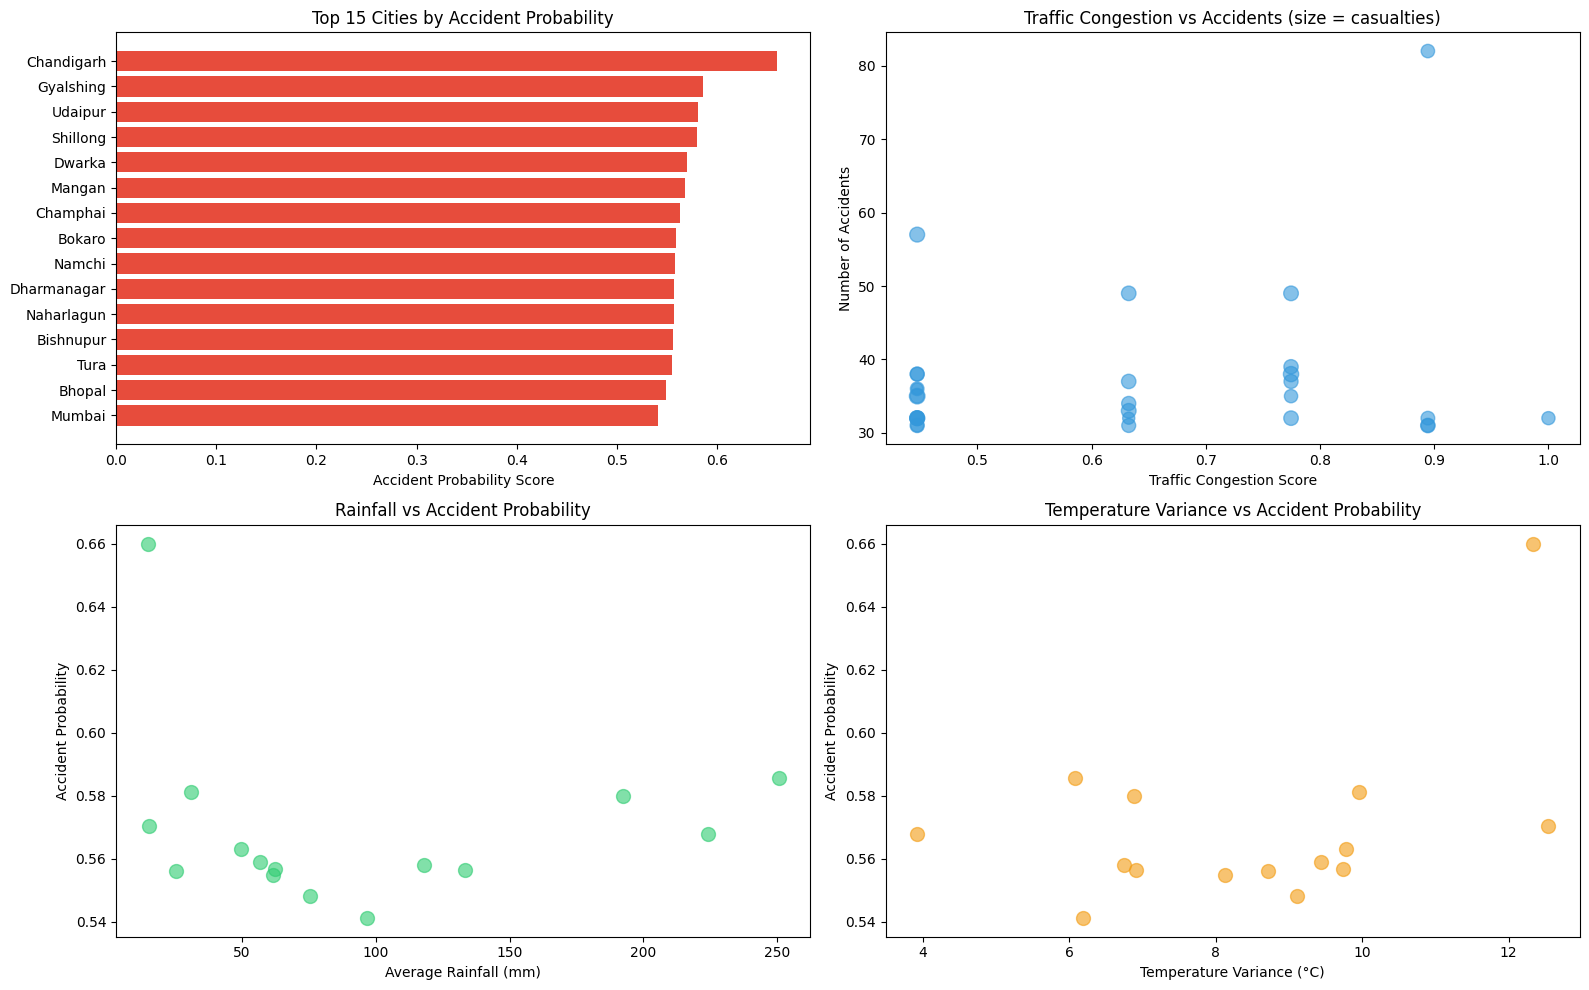


=== Environmental Factor Analysis ===

Highest Average Rainfall: Gyalshing (250.57 mm)
Highest Traffic Congestion: Agartala (Score: 1.00)
Highest Temperature Variance: Jammu (13.66°C)

=== Correlation with Accident Probability ===
Accident_Probability        1.000000
Rainfall_mm                 0.997951
Temp_Variance               0.662482
Traffic_Congestion_Score    0.018641
Name: Accident_Probability, dtype: float64

ANALYSIS COMPLETE!

To predict for a specific city, use:
predict_accident_probability('YourCityName', city_stats)


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_accident_data.csv')

# For demonstration, I'll create a sample based on your data structure
# Replace this with your actual data loading

# Define columns that might be relevant for accident severity
relevant_columns = [
    'City Name',
    'Day of Week',
    'Time of Day',
    'Weather Conditions',
    'Road Type',
    'Road Condition',
    'Lighting Conditions',
    'Number of Vehicles Involved',
    'Number of Casualties',
    'Number of Fatalities',
    'Rainfall_mm',
    'Max_temp_celsius',
    'Min_temp_celsius',
    'Traffic Congestion'
]

def prepare_accident_data(df):
    """
    Prepare data for accident probability prediction
    """
    # Create target variable: Accident Severity
    # Using Number of Casualties and Fatalities to determine severity
    # Handle cases where there might be 0 casualties
    def categorize_severity(casualties):
        if casualties == 0:
            return 'No_Injury'
        elif casualties <= 2:
            return 'Minor'
        else:
            return 'Severe'
    
    df['Accident_Severity'] = df['Number of Casualties'].apply(categorize_severity)
    
    # Calculate accident probability score for each location
    city_stats = df.groupby('City Name').agg({
        'Number of Vehicles Involved': 'mean',
        'Number of Casualties': 'mean',
        'Number of Fatalities': 'sum',
        'Rainfall_mm': 'mean',
        'Max_temp_celsius': 'mean',
        'Min_temp_celsius': 'mean',
        'Traffic Congestion': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0],  # Most common congestion level
        'City Name': 'count'  # Number of accidents
    }).rename(columns={'City Name': 'Accident_Count'})
    
    # Encode Traffic Congestion if it's categorical
    if city_stats['Traffic Congestion'].dtype == 'object':
        congestion_map = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
        city_stats['Traffic_Congestion_Score'] = city_stats['Traffic Congestion'].map(
            lambda x: congestion_map.get(x, 2)
        )
    else:
        city_stats['Traffic_Congestion_Score'] = city_stats['Traffic Congestion']
    
    # Normalize rainfall (higher rainfall = higher risk)
    city_stats['Rainfall_Score'] = city_stats['Rainfall_mm'] / city_stats['Rainfall_mm'].max() if city_stats['Rainfall_mm'].max() > 0 else 0
    
    # Temperature variance (extreme temps = higher risk)
    city_stats['Temp_Variance'] = city_stats['Max_temp_celsius'] - city_stats['Min_temp_celsius']
    city_stats['Temp_Risk_Score'] = city_stats['Temp_Variance'] / city_stats['Temp_Variance'].max() if city_stats['Temp_Variance'].max() > 0 else 0
    
    # Normalize to create probability score (0-1)
    city_stats['Accident_Probability'] = (
        (city_stats['Accident_Count'] / city_stats['Accident_Count'].max()) * 0.25 +
        (city_stats['Number of Casualties'] / city_stats['Number of Casualties'].max()) * 0.20 +
        (city_stats['Number of Vehicles Involved'] / city_stats['Number of Vehicles Involved'].max()) * 0.20 +
        (city_stats['Traffic_Congestion_Score'] / 4) * 0.20 +  # Normalized to 0-1
        city_stats['Rainfall_Score'] * 0.10 +
        city_stats['Temp_Risk_Score'] * 0.05
    )
    
    return df, city_stats

def calculate_correlations(df):
    """
    Calculate correlation of features with target variable
    """
    # Encode categorical variables
    le_dict = {}
    df_encoded = df.copy()
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col in df_encoded.columns:
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
            le_dict[col] = le
    
    # Calculate correlations with Number of Casualties
    correlations = df_encoded.corr()['Number of Casualties'].sort_values(ascending=False)
    
    print("\n=== Feature Correlations with Number of Casualties ===")
    print(correlations)
    
    # Select features with absolute correlation > 0.1
    relevant_features = correlations[abs(correlations) > 0.1].index.tolist()
    
    return relevant_features, le_dict, df_encoded

def build_prediction_model(df_encoded, relevant_features, le_dict):
    """
    Build a Random Forest model to predict accident severity
    """
    # Prepare features and target
    X = df_encoded[relevant_features].drop(['Number of Casualties'], axis=1, errors='ignore')
    y = df_encoded['Accident_Severity']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
    model.fit(X_train, y_train)
    
    # Evaluate
    y_pred = model.predict(X_test)
    
    print("\n=== Model Performance ===")
    print(classification_report(y_test, y_pred))
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\n=== Feature Importance ===")
    print(feature_importance)
    
    return model, le_dict, feature_importance

def predict_accident_probability(city_name, city_stats):
    """
    Predict accident probability for a given city
    """
    if city_name in city_stats.index:
        stats = city_stats.loc[city_name]
        print(f"\n=== Accident Statistics for {city_name} ===")
        print(f"Total Accidents: {stats['Accident_Count']:.0f}")
        print(f"Average Vehicles Involved: {stats['Number of Vehicles Involved']:.2f}")
        print(f"Average Casualties: {stats['Number of Casualties']:.2f}")
        print(f"Total Fatalities: {stats['Number of Fatalities']:.0f}")
        print(f"\n--- Environmental Factors ---")
        print(f"Average Rainfall: {stats['Rainfall_mm']:.2f} mm")
        print(f"Average Max Temperature: {stats['Max_temp_celsius']:.2f}°C")
        print(f"Average Min Temperature: {stats['Min_temp_celsius']:.2f}°C")
        print(f"Temperature Variance: {stats['Temp_Variance']:.2f}°C")
        print(f"Most Common Traffic Congestion: {stats['Traffic Congestion']}")
        print(f"\n--- Risk Scores ---")
        print(f"Traffic Congestion Score: {stats['Traffic_Congestion_Score']:.2f}/4")
        print(f"Rainfall Risk Score: {stats['Rainfall_Score']:.2%}")
        print(f"Temperature Risk Score: {stats['Temp_Risk_Score']:.2%}")
        print(f"\n🎯 ACCIDENT PROBABILITY SCORE: {stats['Accident_Probability']:.2%}")
        
        return stats['Accident_Probability']
    else:
        print(f"City '{city_name}' not found in dataset")
        return None

def visualize_city_rankings(city_stats, top_n=15):
    """
    Visualize top cities by accident probability
    """
    top_cities = city_stats.nlargest(top_n, 'Accident_Probability')
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # 1. Overall Accident Probability
    axes[0, 0].barh(range(len(top_cities)), top_cities['Accident_Probability'], color='#e74c3c')
    axes[0, 0].set_yticks(range(len(top_cities)))
    axes[0, 0].set_yticklabels(top_cities.index)
    axes[0, 0].set_xlabel('Accident Probability Score')
    axes[0, 0].set_title(f'Top {top_n} Cities by Accident Probability')
    axes[0, 0].invert_yaxis()
    
    # 2. Traffic Congestion vs Accidents
    scatter_data = city_stats.nlargest(30, 'Accident_Count')
    axes[0, 1].scatter(scatter_data['Traffic_Congestion_Score'], 
                       scatter_data['Accident_Count'], 
                       s=scatter_data['Number of Casualties']*20,
                       alpha=0.6, color='#3498db')
    axes[0, 1].set_xlabel('Traffic Congestion Score')
    axes[0, 1].set_ylabel('Number of Accidents')
    axes[0, 1].set_title('Traffic Congestion vs Accidents (size = casualties)')
    
    # 3. Rainfall Impact
    axes[1, 0].scatter(top_cities['Rainfall_mm'], 
                       top_cities['Accident_Probability'],
                       s=100, alpha=0.6, color='#2ecc71')
    axes[1, 0].set_xlabel('Average Rainfall (mm)')
    axes[1, 0].set_ylabel('Accident Probability')
    axes[1, 0].set_title('Rainfall vs Accident Probability')
    
    # 4. Temperature Variance Impact
    axes[1, 1].scatter(top_cities['Temp_Variance'], 
                       top_cities['Accident_Probability'],
                       s=100, alpha=0.6, color='#f39c12')
    axes[1, 1].set_xlabel('Temperature Variance (°C)')
    axes[1, 1].set_ylabel('Accident Probability')
    axes[1, 1].set_title('Temperature Variance vs Accident Probability')
    
    plt.tight_layout()
    plt.show()
    
    # Additional summary statistics
    print("\n=== Environmental Factor Analysis ===")
    print(f"\nHighest Average Rainfall: {city_stats['Rainfall_mm'].idxmax()} "
          f"({city_stats['Rainfall_mm'].max():.2f} mm)")
    print(f"Highest Traffic Congestion: {city_stats['Traffic_Congestion_Score'].idxmax()} "
          f"(Score: {city_stats['Traffic_Congestion_Score'].max():.2f})")
    print(f"Highest Temperature Variance: {city_stats['Temp_Variance'].idxmax()} "
          f"({city_stats['Temp_Variance'].max():.2f}°C)")
    
    # Correlation analysis
    print("\n=== Correlation with Accident Probability ===")
    correlations = city_stats[['Accident_Probability', 'Rainfall_mm', 
                                'Traffic_Congestion_Score', 'Temp_Variance']].corr()['Accident_Probability']
    print(correlations.sort_values(ascending=False))

# Main execution
if __name__ == "__main__":
    try:
        # Load the dataset
        print("Loading dataset from final_dataframe.csv...")
        df = pd.read_csv('final_dataframe.csv')
        
        print(f"Dataset loaded successfully! Shape: {df.shape}")
        print(f"\nColumns: {df.columns.tolist()}")
        print(f"\nFirst few rows:")
        print(df.head())
        
        # Step 1: Prepare data and calculate city statistics
        print("\n" + "="*60)
        print("STEP 1: Preparing data and calculating city statistics...")
        print("="*60)
        df_prepared, city_stats = prepare_accident_data(df)
        print(f"\nCity statistics calculated for {len(city_stats)} cities")
        
        # Step 2: Calculate correlations
        print("\n" + "="*60)
        print("STEP 2: Calculating feature correlations...")
        print("="*60)
        relevant_features, le_dict, df_encoded = calculate_correlations(df_prepared)
        
        # Step 3: Build prediction model
        print("\n" + "="*60)
        print("STEP 3: Building prediction model...")
        print("="*60)
        model, le_dict, feature_imp = build_prediction_model(df_encoded, relevant_features, le_dict)
        
        # Step 4: Display available cities
        print("\n" + "="*60)
        print("AVAILABLE CITIES (Dropdown Options)")
        print("="*60)
        cities = sorted(df['City Name'].unique())
        print(f"Total cities: {len(cities)}")
        for i, city in enumerate(cities, 1):
            print(f"{i}. {city}")
        
        # Step 5: Show top 5 riskiest cities
        print("\n" + "="*60)
        print("TOP 5 RISKIEST CITIES")
        print("="*60)
        top_5_cities = city_stats.nlargest(5, 'Accident_Probability')
        for i, (city, row) in enumerate(top_5_cities.iterrows(), 1):
            print(f"\n{i}. {city}")
            predict_accident_probability(city, city_stats)
        
        # Step 6: Visualize results
        print("\n" + "="*60)
        print("STEP 4: Generating visualizations...")
        print("="*60)
        visualize_city_rankings(city_stats, top_n=15)
        
        print("\n" + "="*60)
        print("ANALYSIS COMPLETE!")
        print("="*60)
        print("\nTo predict for a specific city, use:")
        print("predict_accident_probability('YourCityName', city_stats)")
        
    except FileNotFoundError:
        print("ERROR: 'final_dataframe.csv' not found in the current directory.")
        print("Please ensure the file is in the same folder as this script.")
    except Exception as e:
        print(f"ERROR: An error occurred: {str(e)}")
        import traceback
        traceback.print_exc()